<a href="https://colab.research.google.com/github/mariuszkr33/dw_matrix/blob/master/Renew_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
np.random.seed(0)

from sklearn.model_selection import cross_val_score, train_test_split, GroupKFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
#import scikitplot as skplt
#import eli5

import xgboost as xgb

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ModuleNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_train = pd.read_csv(r'/content/drive/MyDrive/ReNew_Participants_Data/train.csv')
df_test = pd.read_csv(r'/content/drive/MyDrive/ReNew_Participants_Data/test.csv')

In [ ]:
df = pd.concat([df_train, df_test])
df.shape

(1212806, 16)

In [ ]:
df.head()

,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target
0,2021-02-19 20:18:00,816.636759,834.917206,31.694380,1159.616602,65.954214,917.897085,31.881972,31.504713,141.457644,165.501518,280.864782,7.057000,0.544082,Turbine_108,47.582787
1,2021-04-27 04:55:00,419.107829,421.050873,12.894948,928.747996,59.571319,445.554250,32.423705,32.755770,89.186457,113.835236,299.552460,5.474937,0.469031,Turbine_18,46.070328
2,2021-01-25 06:26:00,1303.530558,1337.566142,16.648388,1201.219775,61.270498,1364.716003,11.446849,18.332985,230.622309,281.452253,84.960106,8.092457,0.622318,Turbine_105,39.989236
3,2021-10-30 03:47:00,61.494872,53.481008,28.388141,769.806122,40.674348,14.324897,34.253204,32.662889,66.211015,75.017531,87.261119,4.071032,0.760719,Turbine_15,46.056587
4,2021-03-15 00:39:00,593.514364,611.659108,31.519527,1046.916768,64.341763,599.020172,32.405586,31.466387,137.163938,160.202421,313.724818,6.357943,0.346068,Turbine_01,54.346095


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1212806 entries, 0 to 303201
Data columns (total 16 columns):
 #   Column                                  Non-Null Count    Dtype  
---  ------                                  --------------    -----  
 0   timestamp                               1212806 non-null  object 
 1   active_power_calculated_by_converter    1212806 non-null  float64
 2   active_power_raw                        1212806 non-null  float64
 3   ambient_temperature                     1212806 non-null  float64
 4   generator_speed                         1212806 non-null  float64
 5   generator_winding_temp_max              1212806 non-null  float64
 6   grid_power10min_average                 1212806 non-null  float64
 7   nc1_inside_temp                         1212806 non-null  float64
 8   nacelle_temp                            1212806 non-null  float64
 9   reactice_power_calculated_by_converter  1212806 non-null  float64
 10  reactive_power                 

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [ ]:
df = df.sort_values(by=["turbine_id", "timestamp"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1212806 entries, 0 to 303201
Data columns (total 16 columns):
 #   Column                                  Non-Null Count    Dtype         
---  ------                                  --------------    -----         
 0   timestamp                               1212806 non-null  datetime64[ns]
 1   active_power_calculated_by_converter    1212806 non-null  float64       
 2   active_power_raw                        1212806 non-null  float64       
 3   ambient_temperature                     1212806 non-null  float64       
 4   generator_speed                         1212806 non-null  float64       
 5   generator_winding_temp_max              1212806 non-null  float64       
 6   grid_power10min_average                 1212806 non-null  float64       
 7   nc1_inside_temp                         1212806 non-null  float64       
 8   nacelle_temp                            1212806 non-null  float64       
 9   reactice_power_calculated

In [ ]:
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute
df['dayofyear'] = df['timestamp'].dt.dayofyear
df["dayofweek"] = df["timestamp"].dt.dayofweek


In [ ]:
df.head()

,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,...,turbine_id,Target,year,month,day,hour,minute,day_of_year,dayofyear,dayofweek
45421,2021-01-01 00:01:00,828.392253,847.524780,23.749945,1164.353088,56.914901,833.398712,23.851615,23.613581,138.066790,...,0,43.430870,2021,1,1,0,1,1,1,4
198824,2021-01-01 00:18:00,806.374471,822.084910,23.529463,1155.319580,56.293666,845.768372,23.738031,23.377838,133.342974,...,0,NaN,2021,1,1,0,18,1,1,4
637710,2021-01-01 00:19:00,788.036977,805.983439,23.554084,1145.260596,56.114977,842.250692,23.729494,23.390310,128.261094,...,0,43.448366,2021,1,1,0,19,1,1,4
145972,2021-01-01 00:29:00,895.530284,916.572154,23.536345,1195.360205,55.656287,841.382243,23.711153,23.362860,151.804540,...,0,43.462683,2021,1,1,0,29,1,1,4
456891,2021-01-01 00:30:00,915.541250,939.767242,23.545960,1199.266541,55.623487,850.605764,23.719509,23.386191,151.813978,...,0,43.457064,2021,1,1,0,30,1,1,4


In [ ]:
df['turbine_id'].nunique()

16

In [ ]:
df['turbine_id'].value_counts()

Turbine_15     77581
Turbine_18     77202
Turbine_97     77024
Turbine_120    76870
Turbine_158    76782
Turbine_105    76649
Turbine_108    76422
Turbine_103    75926
Turbine_14     75894
Turbine_139    75820
Turbine_13     75586
Turbine_20     75456
Turbine_19     75054
Turbine_123    74908
Turbine_10     73422
Turbine_01     72210
Name: turbine_id, dtype: int64

In [ ]:
df['turbine_id'] = df['turbine_id'].factorize()[0]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1212806 entries, 0 to 303201
Data columns (total 22 columns):
 #   Column                                  Non-Null Count    Dtype         
---  ------                                  --------------    -----         
 0   timestamp                               1212806 non-null  datetime64[ns]
 1   active_power_calculated_by_converter    1212806 non-null  float64       
 2   active_power_raw                        1212806 non-null  float64       
 3   ambient_temperature                     1212806 non-null  float64       
 4   generator_speed                         1212806 non-null  float64       
 5   generator_winding_temp_max              1212806 non-null  float64       
 6   grid_power10min_average                 1212806 non-null  float64       
 7   nc1_inside_temp                         1212806 non-null  float64       
 8   nacelle_temp                            1212806 non-null  float64       
 9   reactice_power_calculated

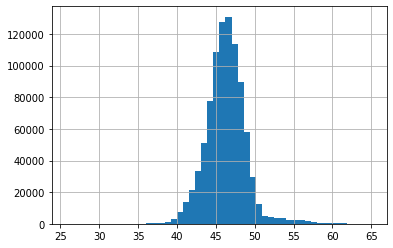

In [ ]:
df['Target'].hist(bins=50);

In [ ]:
df_group = df.groupby(["turbine_id"]).agg(["mean", "std", "median", "size"])["Target"].reset_index()


df_ext = pd.merge(df, df_group, on=["turbine_id"], how="left").fillna(-1)
df_ext.head()

,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,...,day,hour,minute,day_of_year,dayofyear,dayofweek,mean,std,median,size
0,2021-01-01 00:01:00,828.392253,847.524780,23.749945,1164.353088,56.914901,833.398712,23.851615,23.613581,138.066790,...,1,0,1,1,1,4,46.549006,1.83495,46.639037,76422
1,2021-01-01 00:18:00,806.374471,822.084910,23.529463,1155.319580,56.293666,845.768372,23.738031,23.377838,133.342974,...,1,0,18,1,1,4,46.549006,1.83495,46.639037,76422
2,2021-01-01 00:19:00,788.036977,805.983439,23.554084,1145.260596,56.114977,842.250692,23.729494,23.390310,128.261094,...,1,0,19,1,1,4,46.549006,1.83495,46.639037,76422
3,2021-01-01 00:29:00,895.530284,916.572154,23.536345,1195.360205,55.656287,841.382243,23.711153,23.362860,151.804540,...,1,0,29,1,1,4,46.549006,1.83495,46.639037,76422
4,2021-01-01 00:30:00,915.541250,939.767242,23.545960,1199.266541,55.623487,850.605764,23.719509,23.386191,151.813978,...,1,0,30,1,1,4,46.549006,1.83495,46.639037,76422


In [ ]:
feats = df_ext.select_dtypes("number").columns
target_list = ["Target"]
feats = [x for x in feats if x not in target_list]

In [ ]:
df_train = df_ext[ df["Target"].notnull() ].copy()
df_test = df_ext[ df["Target"].isnull() ].copy()

X_train = df_train[feats].values
y_train = df_train["Target"].values
X_test = df_test[feats].values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


ValueError: ignored

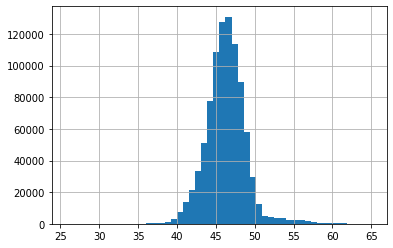

In [ ]:
df_train['Target'].hist(bins=50);

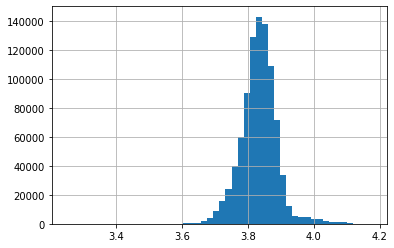

In [ ]:
df_train["Target_log"] = np.log( df_train['Target'] )
df_train['Target_log'].hist(bins=50);


In [ ]:
y_train = df_train["Target_log"].values

In [ ]:
cv = GroupKFold(n_splits=5)

model = xgb.XGBRegressor(max_depth=7, n_estimators=100, learning_rate=0.1, random_state=0)
scores = cross_val_score(model, X_train, y_train, groups=df_train["turbine_id"], cv=cv, scoring="neg_mean_absolute_percentage_error")
print("score: ", np.mean(scores), "std: ", np.std(scores))

[05:41:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:48:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:54:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:59:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:05:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
score:  -0.036227253841799055 std:  0.009055295837852743


In [ ]:
model = xgb.XGBRegressor(max_depth=7, n_estimators=100,learning_rate=0.1, random_state=0)
model.fit(X_train,y_train)
y_log_pred = model.predict(X_test)


[07:39:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
y_pred = np.exp(y_log_pred)

In [ ]:
skplt.estimators.plot_feature_importances(model, feature_names=feats, x_tick_rotation=90, figsize=(15, 5));
#eli5.show_weights(model, feature_names=feats)

NameError: ignored

In [ ]:
df_test["Target"] = y_pred

In [ ]:
df_test[ ["Target"] ].to_csv('../content/drive/MyDrive/ReNew_Participants_Data/simple_submission_log.csv', index=False)